Prerequisites
--------
------------


Registration number: 191910

Alpha = 1 + mod(910,3)

Alpha = 2

In [1]:
import matplotlib as mp
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.figure import Figure
import numpy as np
import scipy as sp
import math
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio, display, Latex

In [2]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%3)
display(Latex(r'\alpha : ' + str(alpha)))

<IPython.core.display.Latex object>

In [3]:
from google.colab import drive
drive.mount("/content/drive")
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 7

Mounted at /content/drive
/content/drive/My Drive/DSP LAB/Experiment 7


Problem  #1
-----
-----

Question 1
---------------

In [8]:
def compute_mainlobe_width(spectrum):
    abs_spectrum = np.abs(spectrum)
    current_value = abs_spectrum[0]
    for ind, next_value in enumerate(abs_spectrum):
        if next_value > current_value:
            break
        else:
            current_value = next_value        
    return 2 * ind - 1

def compute_sidelobe_level(spectrum):
    mainlobe_width = compute_mainlobe_width(spectrum)
    ind = int((mainlobe_width - 1) / 2)
    abs_spectrum = np.abs(spectrum)
    return 20 * np.log10(abs_spectrum[ind:].max() / abs_spectrum.max())

def plot_window(window):
    m = 513
    w = sg.get_window(window, m)
    n = 4096
    t = np.arange(m)
    w_fft = np.fft.rfft(w, n)
    freqs = np.fft.rfftfreq(n, d=1/m)
    plt.figure(figsize=(18, 9))
    plt.subplot(121)
    plt.plot(t, w)
    plt.xlabel(r'$Samples$')
    plt.ylabel(r'$Amplitude$')
    plt.title('%s window' %(window))
    plt.xlim(0, t.size)
    plt.ylim(-0.025, 1.025)
    plt.subplot(122)
    plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))
    plt.xlim(0, 25)
    plt.ylim(-120, 1)
    width = compute_mainlobe_width(w_fft)
    width_bins = width * m / n
    level = compute_sidelobe_level(w_fft)
    ylim_range = plt.ylim()
    plt.vlines((width - 1) / 2 * m / n, ylim_range[0], ylim_range[1], lw=3)
    xlim_range = plt.xlim()
    plt.hlines(level, xlim_range[0], xlim_range[1], lw=3)
    plt.title("{} window\nmainlobe width = {:.0f} bins, sidelobe level = {:.0f} dB".format(window,
                                                                       width_bins, 
                                                                       level))
    plt.xlabel(r'$Frequency\ bin$')

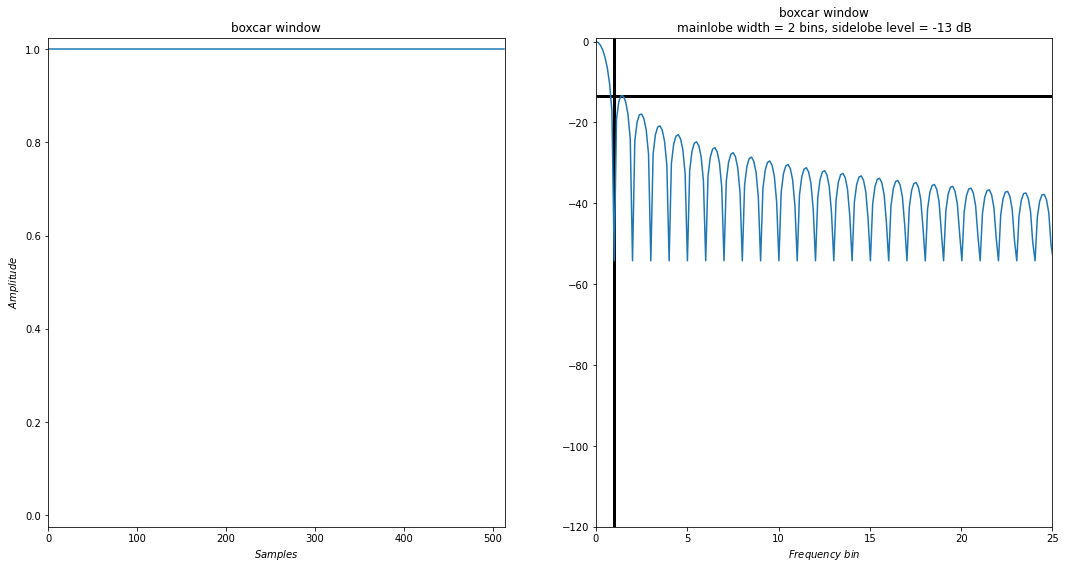

In [9]:
plot_window('boxcar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


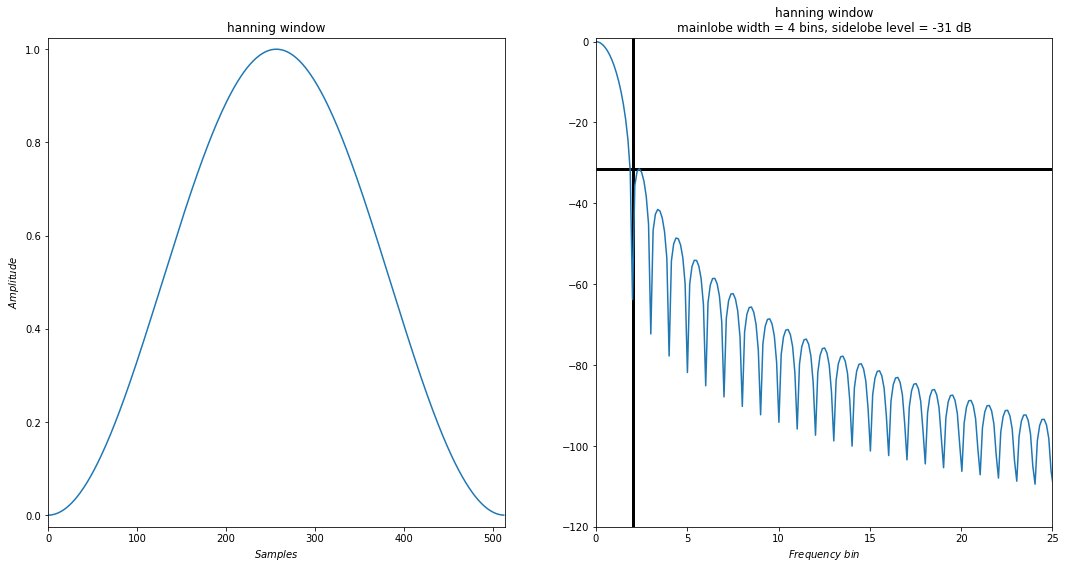

In [10]:
plot_window('hanning') 

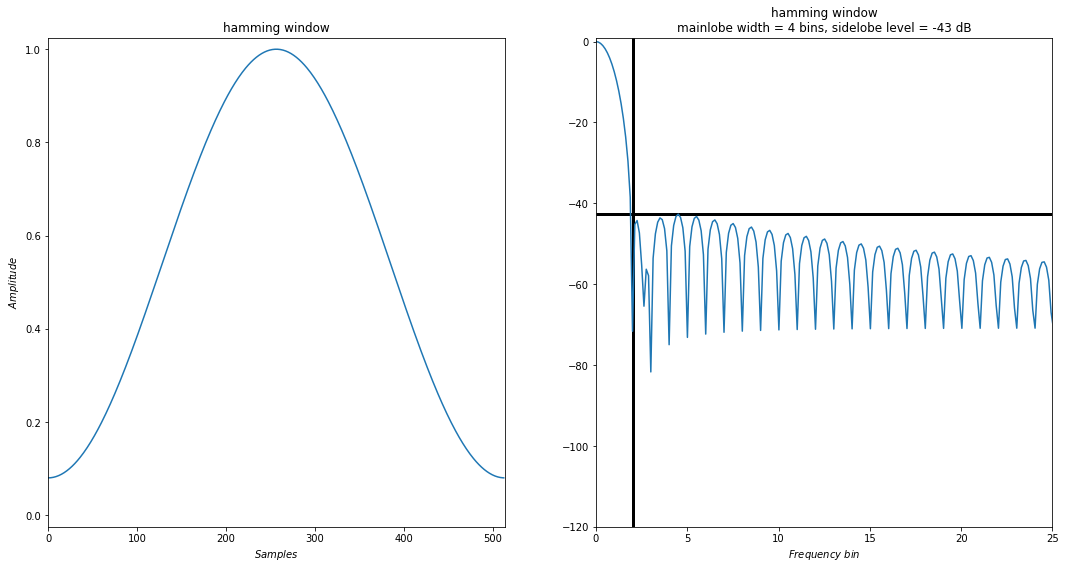

In [11]:
plot_window('hamming')

Question 2
---------------

In [20]:

def diff_len_blackman(diff_len):
  window = sg.get_window('blackman', diff_len)
  fft_len = 1024
  m = 513
  n = 4096
  spec = np.abs(np.fft.rfft(window, n=fft_len))
  freq = np.fft.rfftfreq(fft_len, d=1/diff_len)
  plt.figure(figsize=(18,9))
  plt.plot(freq, 20*np.log10(np.abs(spec) / diff_len))
  width = compute_mainlobe_width(spec)
  width_bins = width * m / n
  level = compute_sidelobe_level(spec)
  ylim_range = plt.ylim()
  plt.vlines((width - 1) / 2 * m / n, ylim_range[0], ylim_range[1], lw=3)
  xlim_range = plt.xlim()
  plt.hlines(level, xlim_range[0], xlim_range[1], lw=3)
  plt.title(r'$FFT\ Spectrum\ for\ Blackman\ window\ of\ length\ %d$' %(diff_len), fontsize=18)
  plt.xlabel(r'$Frequency$', fontsize=16)
  plt.ylabel(r'$|X(\Omega)|$', fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


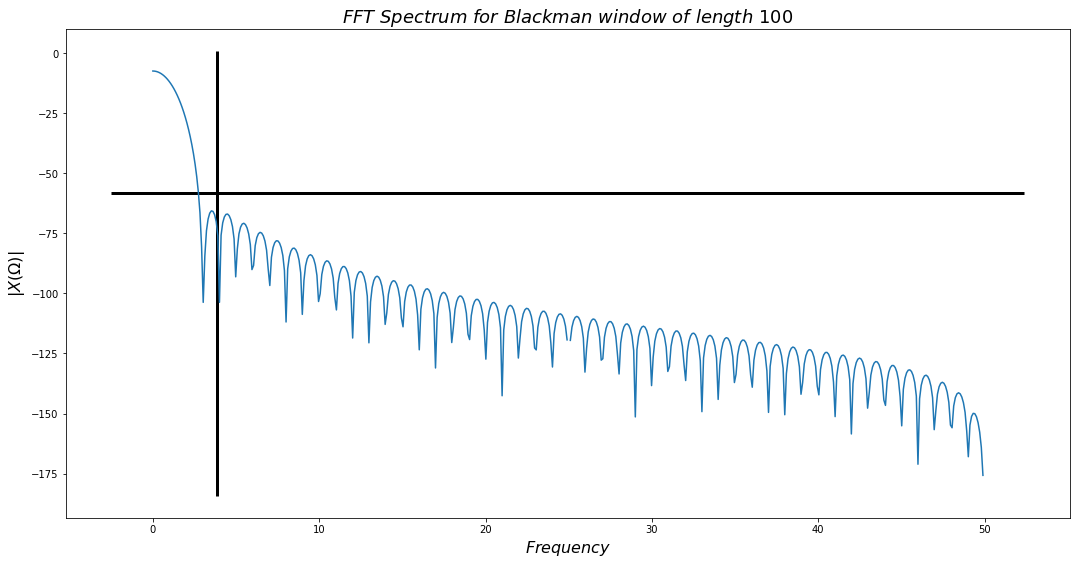

In [21]:
diff_len_blackman(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


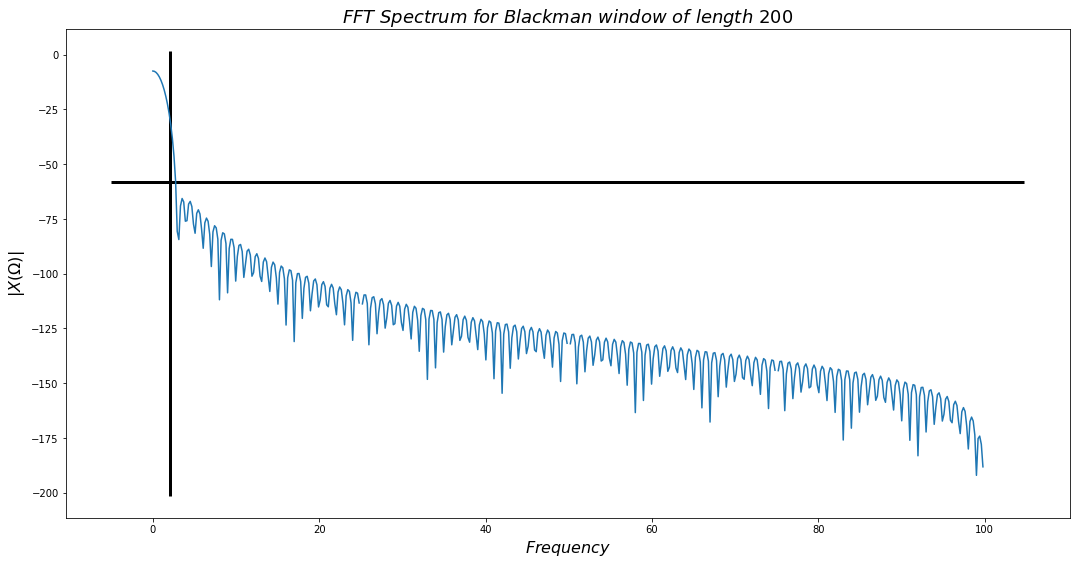

In [22]:
diff_len_blackman(200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


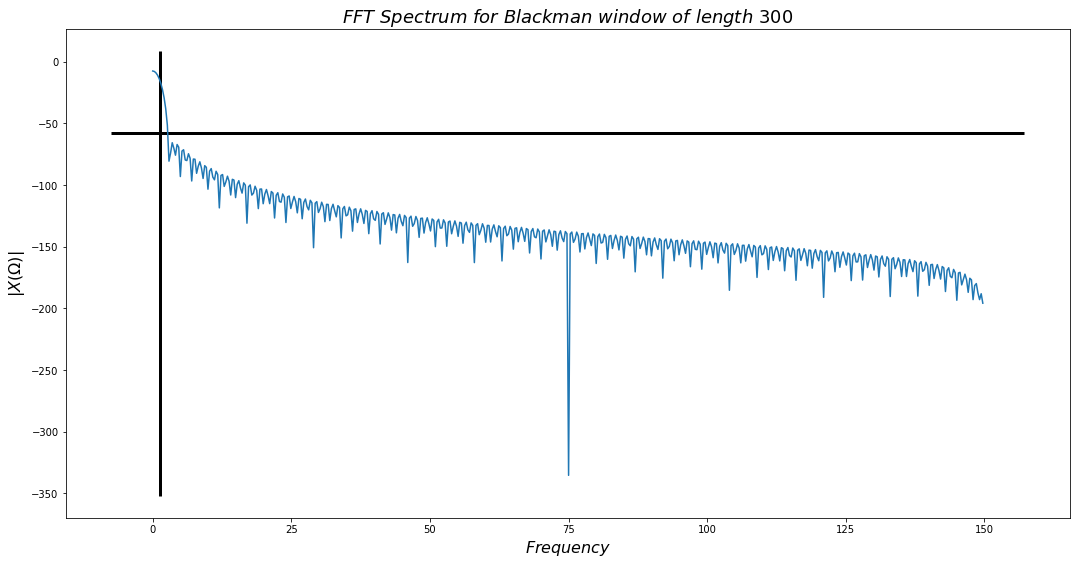

In [23]:
diff_len_blackman(300)

Problem  #2
-----
-----

Question 1
---------------

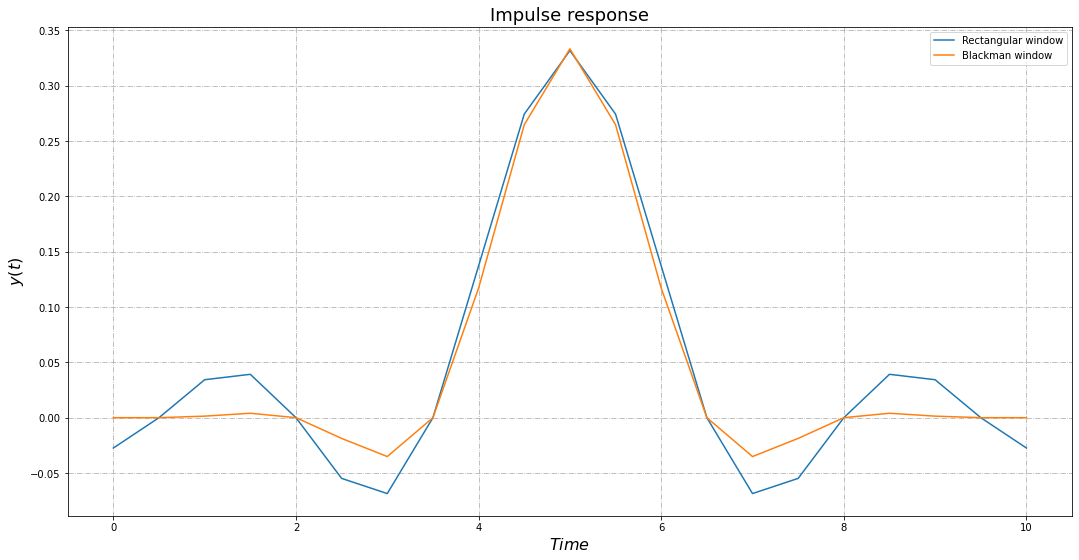

In [35]:
p_2_f_s = 2
p_2_c_f = ((np.pi/(alpha + 1))*(p_2_f_s))/(2*np.pi)
p_2_win_1 = sg.firwin(21, p_2_c_f, window='boxcar', pass_zero='lowpass')
p_2_z, p_2_h = sg.freqz(p_2_win_1, worN=1024)
p_2_win_2 = sg.firwin(21, p_2_c_f, window='blackman', pass_zero='lowpass')
p_2_z_2, p_2_h_2 = sg.freqz(p_2_win_2, worN=1024)

p_2_t = np.arange(0, 10.5, 1/p_2_f_s)
plt.figure(figsize=(18,9))
plt.plot(p_2_t, sg.lfilter(p_2_win_1, 1, sg.unit_impulse(len(p_2_win_1))), label='Rectangular window')
plt.plot(p_2_t, sg.lfilter(p_2_win_2, 1, sg.unit_impulse(len(p_2_win_2))), label='Blackman window')
plt.title('Impulse response', fontsize=18)
plt.ylabel(r'$y(t)$', fontsize=16)
plt.xlabel(r'$Time$', fontsize=16)
plt.legend()
plt.grid(True, which='both',ls='dashdot')
plt.show()

Question 2
---------------

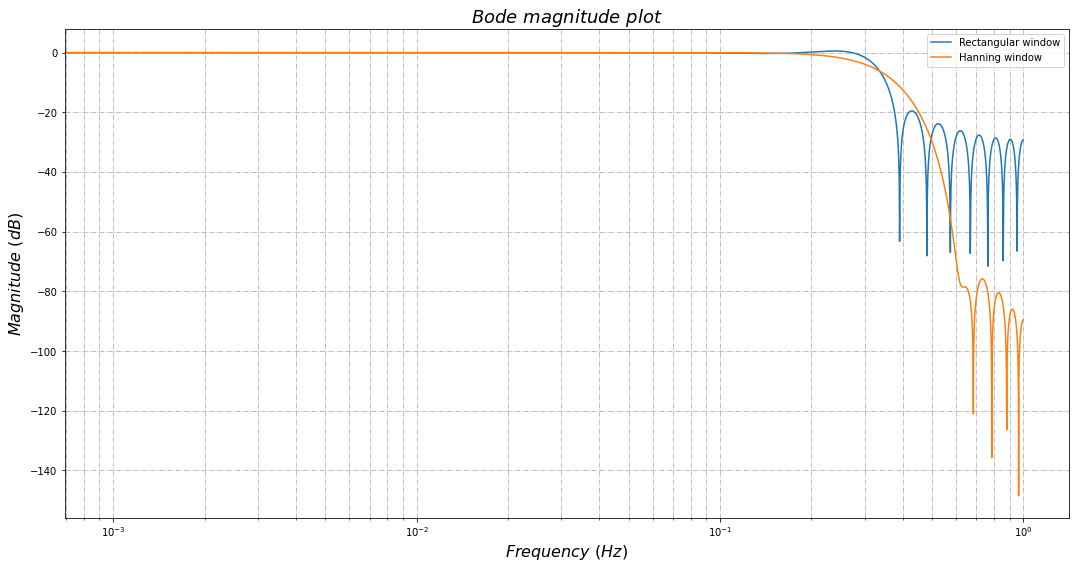

In [32]:
plt.figure(figsize=(18,9))
plt.semilogx(p_2_z*(p_2_f_s/(2*np.pi)), 20*np.log10(np.abs(p_2_h)), label='Rectangular window')
plt.semilogx(p_2_z_2*(p_2_f_s/(2*np.pi)), 20*np.log10(np.abs(p_2_h_2)), label='Hanning window')
plt.title(r'$Bode\ magnitude\ plot$',fontsize=18)
plt.xlabel(r'$Frequency\ (Hz)$', fontsize=16)
plt.ylabel(r'$Magnitude\ (dB)$', fontsize=16)
plt.grid(True, which='both',ls='dashdot')
plt.legend()

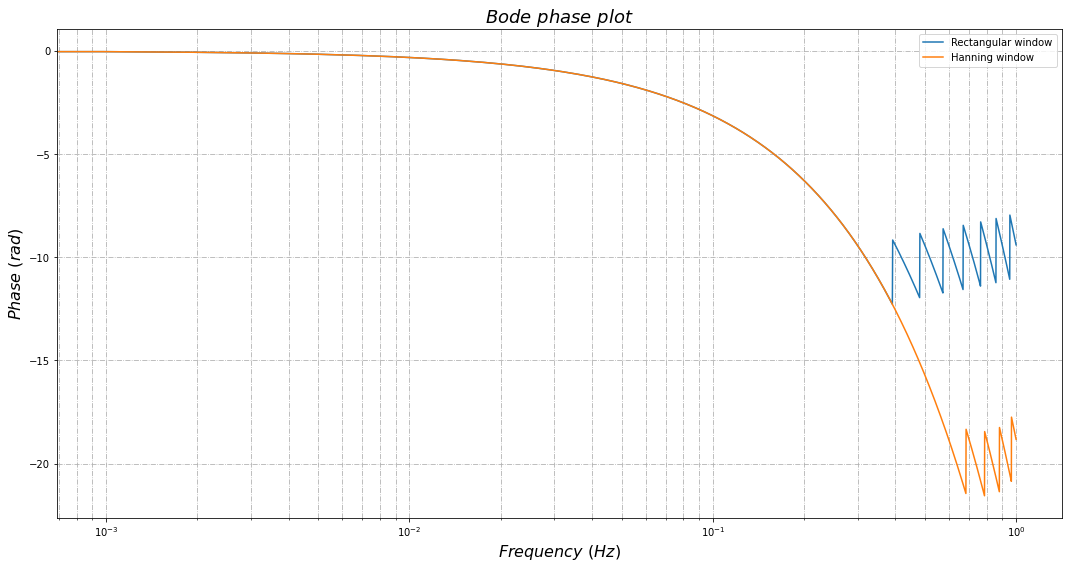

In [31]:
plt.figure(figsize=(18,9))
plt.semilogx(p_2_z*(p_2_f_s/(2*np.pi)), np.unwrap(np.angle(p_2_h)), label='Rectangular window')
plt.semilogx(p_2_z_2*(p_2_f_s/(2*np.pi)), np.unwrap(np.angle(p_2_h_2)), label='Hanning window')
plt.title(r'$Bode\ phase\ plot$',fontsize=18)
plt.xlabel(r'$Frequency\ (Hz)$', fontsize=16)
plt.ylabel(r'$Phase\ (rad)$', fontsize=16)
plt.grid(True, which='both', ls='dashdot')
plt.legend()

Problem  #3
-----
-----

In [36]:
def plot_spectrogram(signal, sample_s, overlap, s_n=None, window=None, length=None):
  plt.figure(figsize=(18,9))
  spec, freqs, t, im = plt.specgram(signal, NFFT=length,
                                   window=sg.get_window(window, length),
                                   noverlap=overlap,Fs=sample_s,
                                   scale='dB',vmax=0)
  plt.title(r'$Spectrogram\ of\ %s\ with\ %s\ window\ of\ length\ %d$'
            %(s_n if s_n else 'signal', window, length), fontsize = 18)
  plt.ylabel('Frequency [Hz]', fontsize=16)
  plt.xlabel('Time [sec]', fontsize=16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 12)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


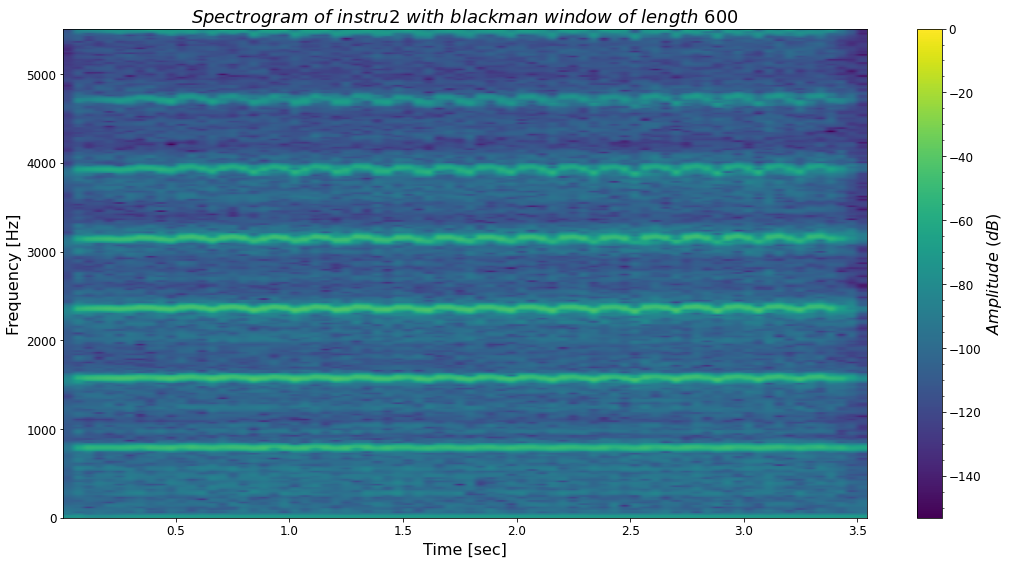

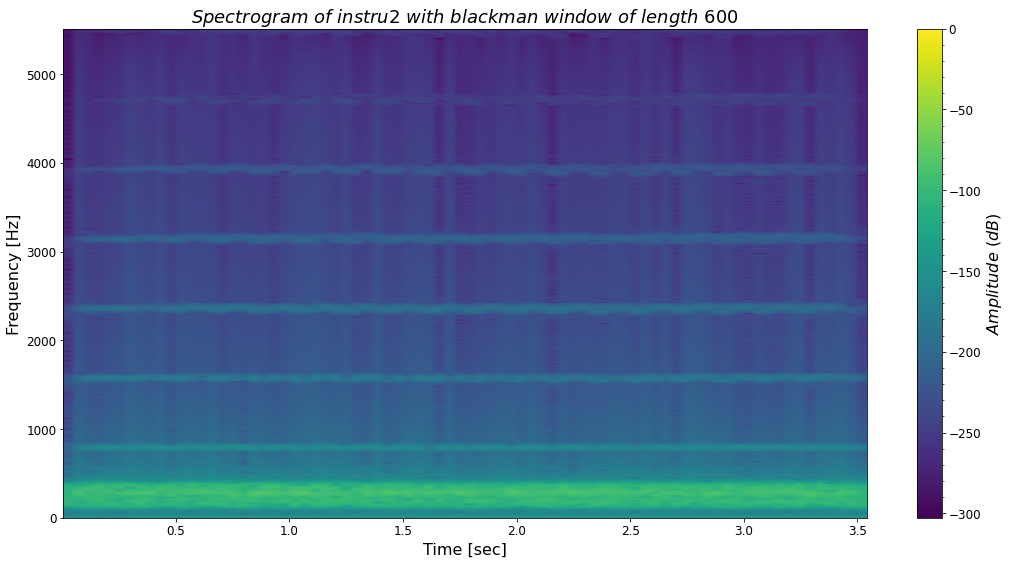

In [37]:
p_3_f_s, p_3_signal = wavfile.read('instru%d.wav' %(alpha))
p_3_signal = p_3_signal/32767.0
plot_spectrogram(p_3_signal, p_3_f_s, overlap=100,
                 s_n='instru%d' %(alpha), window='blackman', length=600)

F_1 = 200
Fu = 300
p_3_F_s_1 = 100
p_3_F_s_2 = 400
p_3_f_1 = F_1/p_3_f_s
fu = Fu/p_3_f_s
p_3_f_s_1 = p_3_F_s_1/p_3_f_s
p_3_f_s_2 = p_3_F_s_2/p_3_f_s
p_3_f_c_1 = 0.5*(p_3_f_s_1+p_3_f_1)
p_3_f_c_2 = 0.5*(p_3_f_s_2+fu)

if np.ceil(5.5 /(p_3_f_1 - p_3_f_s_1)) % 2:
    M = int(np.ceil(5.5/(p_3_f_1-p_3_f_s_1)))
else:
    M = int(np.ceil(5.5/(p_3_f_1-p_3_f_s_1))+1)

num = sg.firwin(M, [2*p_3_f_c_1, 2*p_3_f_c_2], window='hanning', pass_zero=False)
y = sg.lfilter(num, sg.unit_impulse(M), p_3_signal)

plot_spectrogram(y, p_3_f_s, overlap=100,
                 s_n='instru%d' %(alpha), window='blackman', length=600)
wavfile.write('instrument_filtered.wav', p_3_f_s, (32767*y).astype(np.int16))
display(Audio(data=(32767*y).astype(np.int16), rate=p_3_f_s))

Problem  #4
-----
-----